In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SimPEG import Utils
from scipy.constants import G
import time

In [2]:
X, Y = np.meshgrid(np.arange(-10.01,11,0.5), np.arange(-10.01,11,0.5))
Z = np.ones_like(X) * 10

x, y, z = X.reshape(-1), Y.reshape(-1), Z.reshape(-1)

In [3]:
# Define sphere at origin
R = 1 # meters
xc, yc, zc = 0, 0, 0
rho = 1.

unit_conv = 1e+8  # Unit conversion from SI to (mgal*g/cc)
dx = (x - xc)
dy = (y - yc)
dz = (z - zc)

rvec = np.c_[dx, dy, dz]
r = np.sqrt((dx)**2 + (dy)**2 + (dz)**2)

# Define gravity fields from the source
M = R**3. * 4. / 3. * np.pi * rho

g = -G * (1. / r**3) * M * unit_conv

gx_ana = g * dx
gy_ana = g * dy
gz_ana = g * dz

In [4]:
gxx_ana = -G * M * unit_conv *(
    1/r**3 - 3*dx**2./r**5
)

gxy_ana = -G * M * unit_conv *(
    -3*dx*dy/r**5
)

gxz_ana = -G * M * unit_conv *(
    -3*dx*dz/r**5
)

gyy_ana = -G * M * unit_conv *(
    1/r**3 - 3*dy**2./r**5
)

gyx_ana = -G * M * unit_conv *(
    -3*dy*dx/r**5
)

gyz_ana = -G * M * unit_conv *(
    -3*dy*dz/r**5
)

gzz_ana = -G * M * unit_conv *(
    1/r**3 - 3*dz**2./r**5
)

gzx_ana = -G * M * unit_conv *(
    -3*dz*dx/r**5
)

gzy_ana = -G * M * unit_conv *(
    -3*dy*dz/r**5
)


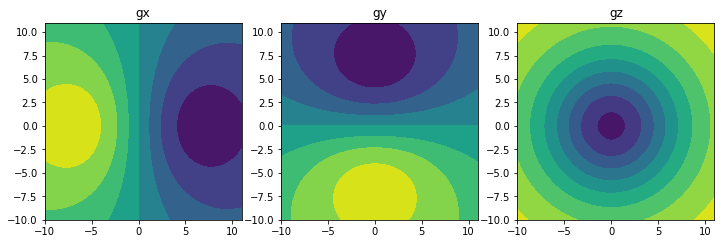

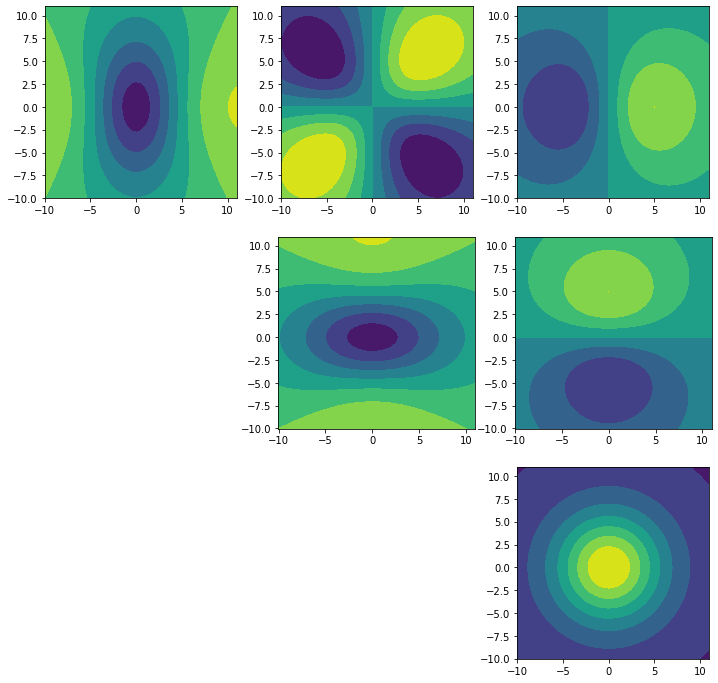

In [5]:
plt.figure(figsize=(12,8))
axs = plt.subplot(1,3,1)
plt.contourf(X, Y, gx_ana.reshape(X.shape))
axs.set_aspect('equal')
axs.set_title("gx")
axs = plt.subplot(1,3,2)
plt.contourf(X, Y, gy_ana.reshape(X.shape))
axs.set_aspect('equal')
axs.set_title("gy")
axs = plt.subplot(1,3,3)
plt.contourf(X, Y, gz_ana.reshape(X.shape))

axs.set_aspect('equal')
axs.set_title("gz")

plt.figure(figsize=(12,12))

axs = plt.subplot(3,3,1)
plt.contourf(X, Y, gxx_ana.reshape(X.shape))
axs.set_aspect('equal')

axs = plt.subplot(3,3,2)
plt.contourf(X, Y, gxy_ana.reshape(X.shape))
axs.set_aspect('equal')

axs = plt.subplot(3,3,3)
plt.contourf(X, Y, gxz_ana.reshape(X.shape))
axs.set_aspect('equal')

axs = plt.subplot(3,3,5)
plt.contourf(X, Y, gyy_ana.reshape(X.shape))

axs = plt.subplot(3,3,6)
plt.contourf(X, Y, gyz_ana.reshape(X.shape))

axs = plt.subplot(3,3,9)
plt.contourf(X, Y, gzz_ana.reshape(X.shape))

axs.set_aspect('equal')



In [6]:
# # Compute it with integral
# Xn = np.c_[-0.5, 0.5]
# Yn = np.c_[-0.5, 0.5]
# Zn = np.c_[-0.5, 0.5]


# row = np.zeros((1, Xn.shape[0]))

# # Compute contribution from each corners
# tx = np.zeros((x.shape[0], Xn.shape[0]))
# ty = np.zeros((x.shape[0], Xn.shape[0]))
# tz = np.zeros((x.shape[0], Xn.shape[0]))

# txx = np.zeros((x.shape[0], Xn.shape[0]))
# txy = np.zeros((x.shape[0], Xn.shape[0]))
# tyy = np.zeros((x.shape[0], Xn.shape[0]))
# txz = np.zeros((x.shape[0], Xn.shape[0]))
# tyz = np.zeros((x.shape[0], Xn.shape[0]))
# eps= 1e-16

# start = time.time()

# for ii in range(x.shape[0]):
#     dz = Zn - z[ii]

#     dy = Yn - y[ii]

#     dx = Xn - x[ii]


#     for aa in range(2):
#         for bb in range(2):
#             for cc in range(2):

#                 r = (
#                         mkvc(dx[:, aa]) ** 2 +
#                         mkvc(dy[:, bb]) ** 2 +
#                         mkvc(dz[:, cc]) ** 2
#                     ) ** (0.50) + eps


#                 tx[ii,:] += NewtG * (-1) ** aa * (-1) ** bb * (-1) ** cc * (
#                     dy[:, bb] * np.log(dz[:, cc] + r + eps) +
#                     dz[:, cc] * np.log(dy[:, bb] + r + eps) -
#                     dx[:, aa] * np.arctan(dy[:, bb] * dz[:, cc] /
#                                           (dx[:, aa] * r + eps)))


#                 ty[ii,:]  += NewtG * (-1) ** aa * (-1) ** bb * (-1) ** cc * (
#                     dx[:, aa] * np.log(dz[:, cc] + r + eps) +
#                     dz[:, cc] * np.log(dx[:, aa] + r + eps) -
#                     dy[:, bb] * np.arctan(dx[:, aa] * dz[:, cc] /
#                                           (dy[:, bb] * r + eps)))


#                 tz[ii,:]  += NewtG * (-1) ** aa * (-1) ** bb * (-1) ** cc * (
#                     dx[:, aa] * np.log(dy[:, bb] + r + eps) +
#                     dy[:, bb] * np.log(dx[:, aa] + r + eps) -
#                     dz[:, cc] * np.arctan(dx[:, aa] * dy[:, bb] /
#                                           (dz[:, cc] * r + eps)))
                
#                 arg = dy[:, bb]*dz[:, cc]/( dx[:, aa]*r + eps)
                
#                 txx[ii,:] -= NewtG * (-1) ** aa * (-1) ** bb * (-1) ** cc * (
#                     dx[:, aa] * dy[:, bb] / (r*(dz[:, cc] + r)+ eps) + 
#                     dx[:, aa] * dz[:, cc] / (r*(dy[:, bb] + r)+ eps) - 
#                     np.arctan(arg+eps) +
#                     dx[:, aa] * (1./ (1+arg**2.)) * 
#                     dy[:, bb]*dz[:, cc]/(dx[:, aa]*r+ eps)**2. * 
#                     (r + dx[:, aa]**2./(r+ eps)) 
#                 )
                
          
#                 txy[ii, :] -= NewtG * (-1) ** aa * (-1) ** bb * (-1) ** cc * (
#                     np.log(dz[:, cc] + r) + dy[:, bb]**2./ (r*(dz[:, cc] + r)) +
#                     dz[:, cc] / (r+eps)  - 
#                     1. / (1+arg**2.+ eps) * (dz[:, cc]/r**2) * (r - dy[:, bb]**2./r)
                    
#                 )
            
#                 txz[ii, :] -= NewtG * (-1) ** aa * (-1) ** bb * (-1) ** cc * (
#                     np.log(dy[:, bb] + r) + dz[:, cc]**2./ (r*(dy[:, bb] + r)) +
#                     dy[:, bb] / r  - 
#                     1. / (1+arg**2.) * (dy[:, bb]/(r**2)) * (r - dz[:, cc]**2./r)
                    
#                 )
                
#                 arg = dx[:, aa]*dz[:, cc]/( dy[:, bb]*r + eps)
                
#                 tyy[ii,:] -= NewtG * (-1) ** aa * (-1) ** bb * (-1) ** cc * (
#                     dy[:, bb] * dx[:, aa] / (r*(dz[:, cc] + r)+ eps) + 
#                     dy[:, bb] * dz[:, cc] / (r*(dx[:, aa] + r)+ eps) - 
#                     np.arctan(arg+eps) +
#                     dy[:, bb] * (1./ (1+arg**2.+ eps)) * 
#                     dx[:, aa]*dz[:, cc]/(dy[:, bb]*r+ eps)**2. * 
#                     (r + dy[:, bb]**2./(r+ eps)) 
#                 )
                
#                 tyz[ii, :] -= NewtG * (-1) ** aa * (-1) ** bb * (-1) ** cc * (
#                     np.log(dx[:, aa] + r) + dz[:, cc]**2./ (r*(dx[:, aa] + r)) +
#                     dx[:, aa] / r  - 
#                     1. / (1+arg**2.) * (dx[:, aa]/(r**2)) * (r - dz[:, cc]**2./r)
                    
#                 )


# print("Run in %f" % (time.time() - start))

In [20]:
components=['gx', 'gy', 'gz', 'gxx', 'gxy', 'gxz', 'gyy', "gzz"]



In [24]:
x.shape[0]


1849

In [23]:
from SimPEG.Utils import mkvc
import scipy.constants as constants
NewtG = constants.G*1e+8
# Compute it with integral
Xn = np.c_[-0.5, 0.5]
Yn = np.c_[-0.5, 0.5]
Zn = np.c_[-0.5, 0.5]

row = np.zeros((1, Xn.shape[0]))

components = ['gx', 'gy', 'gz', 'gxx', 'gxy', 'gxz', 'gyy', "gzz"]
# Compute contribution from each corners
gx = np.zeros((x.shape[0], Xn.shape[0]))
gy = np.zeros((x.shape[0], Xn.shape[0]))
gz = np.zeros((x.shape[0], Xn.shape[0]))

gxx = np.zeros((x.shape[0], Xn.shape[0]))
gxy = np.zeros((x.shape[0], Xn.shape[0]))
gyy = np.zeros((x.shape[0], Xn.shape[0]))
gxz = np.zeros((x.shape[0], Xn.shape[0]))
gyz = np.zeros((x.shape[0], Xn.shape[0]))
eps= 1e-16

start = time.time()

# for ii in range(x.shape[0]):
#     dz = Zn - z[ii]

#     dy = Yn - y[ii]

#     dx = Xn - x[ii]


def calcRow(Xn, Yn, Zn, receiver_location, components=['gx', 'gy', 'gz', 'gxx', 'gxy', 'gxz', 'gyy', 'gyz', "gzz"]):

    dx = Xn - receiver_location[0]
    dy = Yn - receiver_location[1]
    dz = Zn - receiver_location[2]
    
    compDict = {key: np.zeros(Xn.shape[0]) for key in components}    
    
    gxx = np.zeros(Xn.shape[0]) 
    gyy = np.zeros(Xn.shape[0]) 
    
    for aa in range(2):
        for bb in range(2):
            for cc in range(2):

                r = (
                        mkvc(dx[:, aa]) ** 2 +
                        mkvc(dy[:, bb]) ** 2 +
                        mkvc(dz[:, cc]) ** 2
                    ) ** (0.50) + eps

                dz_r = dz[:, cc] + r + eps
                dy_r = dy[:, bb] + r + eps
                dx_r = dx[:, aa] + r + eps
                
                dxr = dx[:, aa] * r + eps
                dyr = dy[:, bb] * r + eps
                dzr = dz[:, cc] * r + eps
                
                dydz = dy[:, bb] * dz[:, cc]
                dxdy = dx[:, aa] * dy[:, bb]
                dxdz = dx[:, aa] * dz[:, cc]

                if 'gx' in components:
                    compDict['gx'] += NewtG * (-1) ** aa * (-1) ** bb * (-1) ** cc * (
                        dy[:, bb] * np.log(dz_r) +
                        dz[:, cc] * np.log(dy_r) -
                        dx[:, aa] * np.arctan(dydz /
                                              dxr)
                    )

                if 'gy' in components:
                    compDict['gy']  += NewtG * (-1) ** aa * (-1) ** bb * (-1) ** cc * (
                        dx[:, aa] * np.log(dz_r) +
                        dz[:, cc] * np.log(dx_r) -
                        dy[:, bb] * np.arctan(dxdz /
                                              dyr)
                    )


                if 'gz' in components:
                    compDict['gz']  += NewtG * (-1) ** aa * (-1) ** bb * (-1) ** cc * (
                        dx[:, aa] * np.log(dy_r) +
                        dy[:, bb] * np.log(dx_r) -
                        dz[:, cc] * np.arctan(dxdy /
                                              dzr)
                    )

                arg = dy[:, bb] * dz[:, cc] / dxr
                
                if ('gxx' in components) or ("gzz" in components):
                    gxx -= NewtG * (-1) ** aa * (-1) ** bb * (-1) ** cc * (
                        dxdy / (r * dz_r + eps) + 
                        dxdz / (r * dy_r + eps) - 
                        np.arctan(arg+eps) +
                        dx[:, aa] * (1./ (1+arg**2.)) * 
                        dydz/dxr**2. * 
                        (r + dx[:, aa]**2./r) 
                    )
                
                if 'gxy' in components:
                    compDict['gxy'] -= NewtG * (-1) ** aa * (-1) ** bb * (-1) ** cc * (
                        np.log(dz_r) + dy[:, bb]**2./ (r*dz_r) +
                        dz[:, cc] / r  - 
                        1. / (1+arg**2.+ eps) * (dz[:, cc]/r**2) * (r - dy[:, bb]**2./r)

                    )
            
                if 'gxz' in components:            
                    compDict['gxz'] -= NewtG * (-1) ** aa * (-1) ** bb * (-1) ** cc * (
                        np.log(dy_r) + dz[:, cc]**2./ (r*dy_r) +
                        dy[:, bb] / r  - 
                        1. / (1+arg**2.) * (dy[:, bb]/(r**2)) * (r - dz[:, cc]**2./r)

                    )
                
                arg = dx[:, aa]*dz[:, cc]/dyr

                if ('gyy' in components) or ("gzz" in components):                
                    gyy -= NewtG * (-1) ** aa * (-1) ** bb * (-1) ** cc * (
                        dxdy / (r*dz_r+ eps) + 
                        dydz / (r*dx_r+ eps) - 
                        np.arctan(arg+eps) +
                        dy[:, bb] * (1./ (1+arg**2.+ eps)) * 
                        dxdz/dyr**2. * 
                        (r + dy[:, bb]**2./r) 
                    )
                
                
                if 'gyz' in components:
                    compDict['gyz'] -= NewtG * (-1) ** aa * (-1) ** bb * (-1) ** cc * (
                        np.log(dx_r) + dz[:, cc]**2./ (r*(dx_r)) +
                        dx[:, aa] / r  - 
                        1. / (1+arg**2.) * (dx[:, aa]/(r**2)) * (r - dz[:, cc]**2./r)

                    )

    if 'gyy' in components:
        compDict['gyy'] = gyy
        
    if 'gxx' in components:
        compDict['gxx'] = gxx
        
    if 'gzz' in components:
        compDict['gzz'] = -gxx - gyy
        
    return np.vstack([compDict[key] for key in list(compDict.keys())])


g = []
for ii in range(x.shape[0]):
    
    g += [calcRow(Xn, Yn, Zn, np.r_[x[ii], y[ii], z[ii]])]
    
fullG = np.vstack(g)
    
print("Run in %f" % (time.time() - start))

Run in 3.763005


In [24]:
# Volume scaling 
Vratio = (4./3.*np.pi*R**3.) / 1

fields = np.dot(fullG, rho*Vratio)
fx = fields[0::9]
fy = fields[1::9]
fz = fields[2::9]
fxx = fields[3::9]
fxy = fields[4::9]
fxz = fields[5::9]
fyy = fields[6::9]
fyz = fields[7::9]
fzz = fields[8::9]

In [25]:
fxx.reshape



<function ndarray.reshape>

Text(0.5, 1.0, 'gzz')

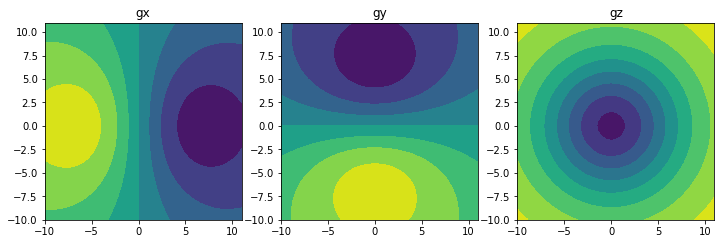

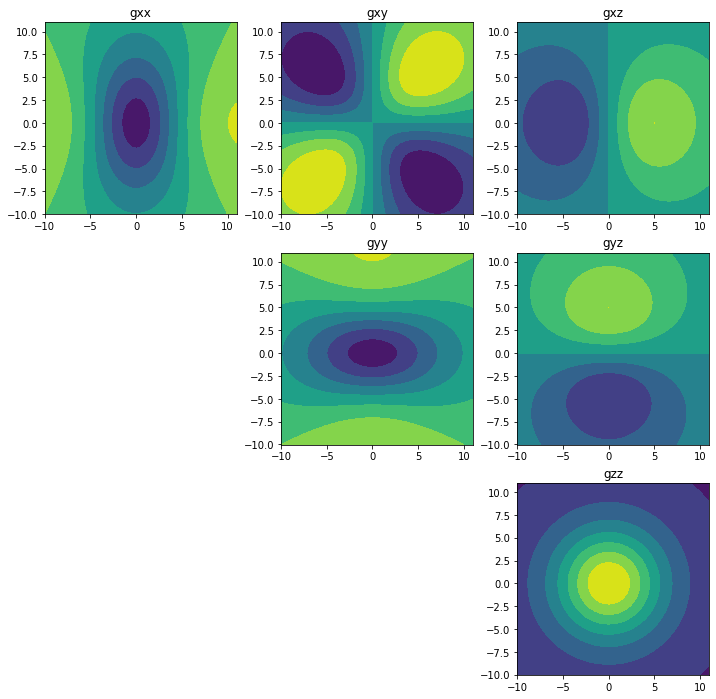

In [26]:
plt.figure(figsize=(12,8))
axs = plt.subplot(1,3,1)
plt.contourf(X, Y, fx.reshape(X.shape))
axs.set_aspect('equal')
axs.set_title("gx")
axs = plt.subplot(1,3,2)
plt.contourf(X, Y, fy.reshape(X.shape))
axs.set_aspect('equal')
axs.set_title("gy")
axs = plt.subplot(1,3,3)
plt.contourf(X, Y, fz.reshape(X.shape))
axs.set_aspect('equal')
axs.set_title("gz")


plt.figure(figsize=(12,12))

axs = plt.subplot(3,3,1)
plt.contourf(X, Y, fxx.reshape(X.shape), )#vmin=gxx_ana.min(), vmax=gxx_ana.max())
axs.set_aspect('equal')
axs.set_title("gxx")

axs = plt.subplot(3,3,2)
plt.contourf(X, Y, fxy.reshape(X.shape), )#vmin=gxy_ana.min(), vmax=gxy_ana.max())
axs.set_aspect('equal')
axs.set_title("gxy")

axs = plt.subplot(3,3,3)
plt.contourf(X, Y, fxz.reshape(X.shape), )#vmin=gxz_ana.min(), vmax=gxz_ana.max())
axs.set_aspect('equal')
axs.set_title("gxz")

axs = plt.subplot(3,3,5)
plt.contourf(X, Y, fyy.reshape(X.shape), )#vmin=gyy_ana.min(), vmax=gyy_ana.max())
axs.set_aspect('equal')
axs.set_title("gyy")

axs = plt.subplot(3,3,6)
plt.contourf(X, Y, fyz.reshape(X.shape), )#vmin=gyz_ana.min(), vmax=gyz_ana.max())
axs.set_aspect('equal')
axs.set_title("gyz")

axs = plt.subplot(3,3,9)
plt.contourf(X, Y, fzz.reshape(X.shape), )#vmin=gzz_ana.min(), vmax=gzz_ana.max())
axs.set_aspect('equal')
axs.set_title("gzz")



In [38]:
(np.dot(gxx_ana, 1).reshape(X.shape) / np.dot(fxx, 1).reshape(X.shape)).max()






1.0364787820368524

Text(0.5, 1.0, 'gzz')

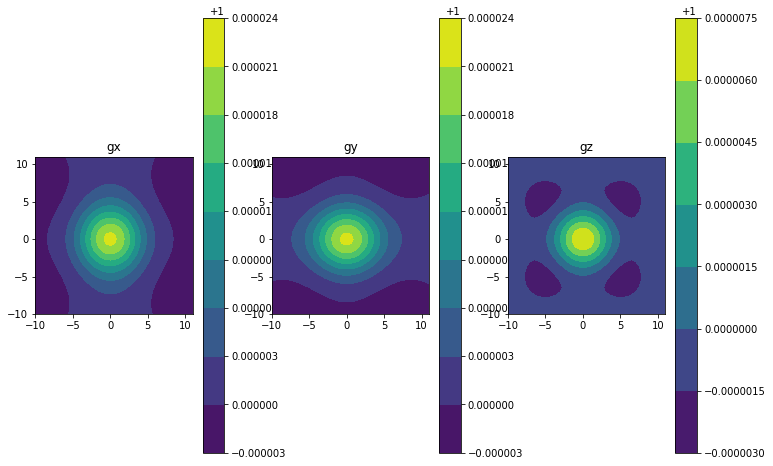

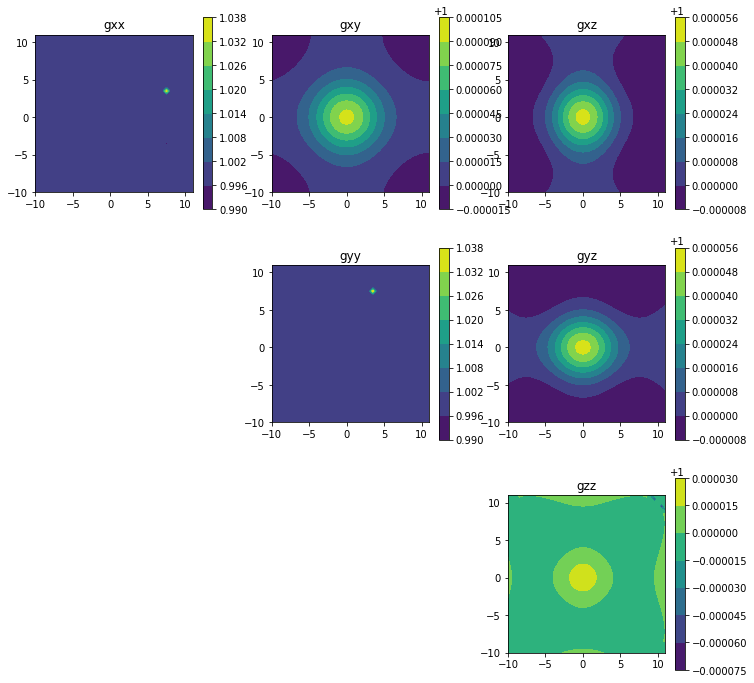

In [39]:
plt.figure(figsize=(12,8))
axs = plt.subplot(1,3,1)
plt.contourf(X, Y, np.dot(gx_ana, 1).reshape(X.shape) / np.dot(fx, 1).reshape(X.shape))
plt.colorbar()
axs.set_aspect('equal')
axs.set_title("gx")
axs = plt.subplot(1,3,2)
plt.contourf(X, Y, np.dot(gy_ana, 1).reshape(X.shape) / np.dot(fy, 1).reshape(X.shape))
plt.colorbar()
axs.set_aspect('equal')
axs.set_title("gy")
axs = plt.subplot(1,3,3)
plt.contourf(X, Y, np.dot(gz_ana, 1).reshape(X.shape) / np.dot(fz, 1).reshape(X.shape))
plt.colorbar()
axs.set_aspect('equal')
axs.set_title("gz")


plt.figure(figsize=(12,12))

axs = plt.subplot(3,3,1)
plt.contourf(X, Y, np.dot(gxx_ana, 1).reshape(X.shape) / np.dot(fxx, 1).reshape(X.shape))
plt.colorbar()
axs.set_aspect('equal')
axs.set_title("gxx")

axs = plt.subplot(3,3,2)
plt.contourf(X, Y, np.dot(gxy_ana, 1).reshape(X.shape) / np.dot(fxy, 1).reshape(X.shape))
plt.colorbar()
axs.set_aspect('equal')
axs.set_title("gxy")

axs = plt.subplot(3,3,3)
plt.contourf(X, Y, np.dot(gxz_ana, 1).reshape(X.shape) / np.dot(fxz, 1).reshape(X.shape))
plt.colorbar()
axs.set_aspect('equal')
axs.set_title("gxz")

axs = plt.subplot(3,3,5)
plt.contourf(X, Y, np.dot(gyy_ana, 1).reshape(X.shape) / np.dot(fyy, 1).reshape(X.shape))
plt.colorbar()
axs.set_aspect('equal')
axs.set_title("gyy")

axs = plt.subplot(3,3,6)
plt.contourf(X, Y, np.dot(gyz_ana, 1).reshape(X.shape) / np.dot(fyz, 1).reshape(X.shape))
plt.colorbar()
axs.set_aspect('equal')
axs.set_title("gyz")

axs = plt.subplot(3,3,9)
plt.contourf(X, Y, np.dot(gzz_ana, 1).reshape(X.shape) / np.dot(fzz, 1).reshape(X.shape))
plt.colorbar()
axs.set_aspect('equal')
axs.set_title("gzz")





In [12]:
from dask.distributed import Client

In [13]:
client = Client()
client

Client Scheduler: tcp://127.0.0.1:53720 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 34.31 GB


In [15]:
from SimPEG import Mesh, PF, Maps

# Test using SimPEG kernel
# Define a mesh
cs = 0.1
hxind = [(cs, 21)]
hyind = [(cs, 21)]
hzind = [(cs, 21)]
mesh = Mesh.TensorMesh([hxind, hyind, hzind], 'CCC')

# Get cells inside the sphere
sph_ind = PF.MagAnalytics.spheremodel(mesh, 0., 0., 0., R)

# Adjust density for volume difference
Vratio = (4./3.*np.pi*R**3.) / (np.sum(sph_ind)*cs**3.)
model = np.ones(mesh.nC)*rho*Vratio
model = model[sph_ind]

# Create reduced identity map for Linear Pproblem
idenMap = Maps.IdentityMap(nP=int(sum(sph_ind)))

# Create plane of observations
locXyz = np.c_[x, y, z]
rxLoc = PF.BaseGrav.RxObs(locXyz)
srcField = PF.BaseGrav.SrcField([rxLoc])
survey = PF.BaseGrav.LinearSurvey(srcField)

survey.components = ["gx", "gy", "gz", "gxx", "gxy", "gxz", "gyy", "gyz", "gzz"]

prob_xyz = PF.Gravity.GravityIntegral(mesh, rhoMap=idenMap,
                                           actInd=sph_ind,
                                           forwardOnly=True,
                                           )

survey.unpair()
survey.pair(prob_xyz)

start = time.time()
fields = prob_xyz.fields(model)
print("Run in %f" % (time.time() - start))


Dask:
n_cpu:  8
n_chunks:  8
Chunk sizes:  2081 518
RAM/chunk:  0.008623664000000001
Total RAM (x n_cpu):  0.06898931200000001
Run in 29.557989


In [7]:
gx_ana, fx

NameError: name 'fx' is not defined

Text(0.5, 1.0, 'gzz')

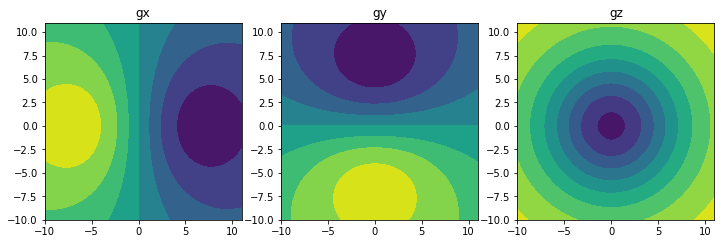

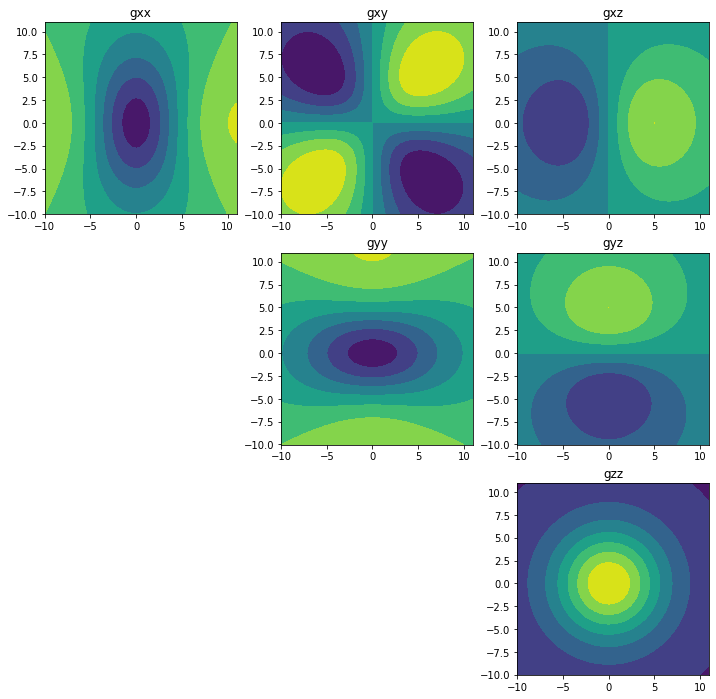

In [8]:
fx = fields[0::9]
fy = fields[1::9]
fz = fields[2::9]
fxx = fields[3::9]
fxy = fields[4::9]
fxz = fields[5::9]
fyy = fields[6::9]
fyz = fields[7::9]
fzz = fields[8::9]



plt.figure(figsize=(12,8))
axs = plt.subplot(1,3,1)
plt.contourf(X, Y, fx.reshape(X.shape))
axs.set_aspect('equal')
axs.set_title("gx")
axs = plt.subplot(1,3,2)
plt.contourf(X, Y, fy.reshape(X.shape))
axs.set_aspect('equal')
axs.set_title("gy")
axs = plt.subplot(1,3,3)
plt.contourf(X, Y, fz.reshape(X.shape))
axs.set_aspect('equal')
axs.set_title("gz")


plt.figure(figsize=(12,12))

axs = plt.subplot(3,3,1)
plt.contourf(X, Y, fxx.reshape(X.shape), )#vmin=gxx_ana.min(), vmax=gxx_ana.max())
axs.set_aspect('equal')
axs.set_title("gxx")

axs = plt.subplot(3,3,2)
plt.contourf(X, Y, fxy.reshape(X.shape), )#vmin=gxy_ana.min(), vmax=gxy_ana.max())
axs.set_aspect('equal')
axs.set_title("gxy")

axs = plt.subplot(3,3,3)
plt.contourf(X, Y, fxz.reshape(X.shape), )#vmin=gxz_ana.min(), vmax=gxz_ana.max())
axs.set_aspect('equal')
axs.set_title("gxz")

axs = plt.subplot(3,3,5)
plt.contourf(X, Y, fyy.reshape(X.shape), )#vmin=gyy_ana.min(), vmax=gyy_ana.max())
axs.set_aspect('equal')
axs.set_title("gyy")

axs = plt.subplot(3,3,6)
plt.contourf(X, Y, fyz.reshape(X.shape), )#vmin=gyz_ana.min(), vmax=gyz_ana.max())
axs.set_aspect('equal')
axs.set_title("gyz")

axs = plt.subplot(3,3,9)
plt.contourf(X, Y, fzz.reshape(X.shape), )#vmin=gzz_ana.min(), vmax=gzz_ana.max())
axs.set_aspect('equal')
axs.set_title("gzz")



In [9]:
np.dot(gx_ana, 1).reshape(X.shape) / np.dot(fx, 1).reshape(X.shape)



array([[0.99999985, 0.99999985, 0.99999986, ..., 0.99999985, 0.99999986,
        0.99999986],
       [0.99999984, 0.99999984, 0.99999984, ..., 0.99999984, 0.99999985,
        0.99999985],
       [0.99999983, 0.99999983, 0.99999983, ..., 0.99999983, 0.99999983,
        0.99999984],
       ...,
       [0.99999984, 0.99999984, 0.99999984, ..., 0.99999984, 0.99999985,
        0.99999985],
       [0.99999986, 0.99999986, 0.99999986, ..., 0.99999986, 0.99999986,
        0.99999986],
       [0.99999987, 0.99999987, 0.99999987, ..., 0.99999987, 0.99999987,
        0.99999987]])

Text(0.5, 1.0, 'gzz')

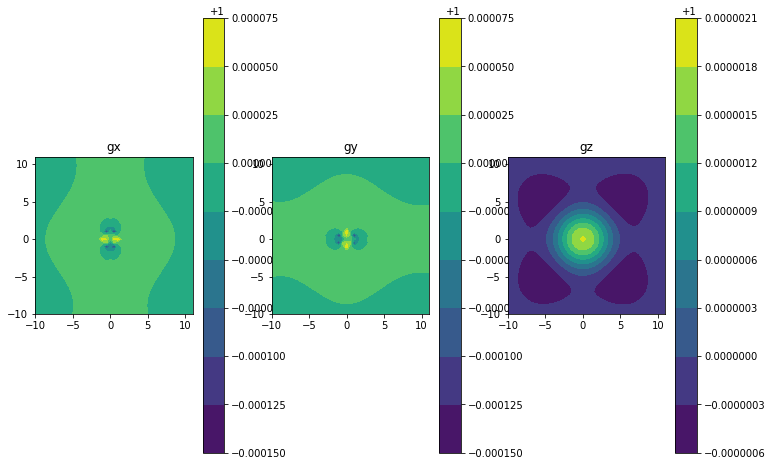

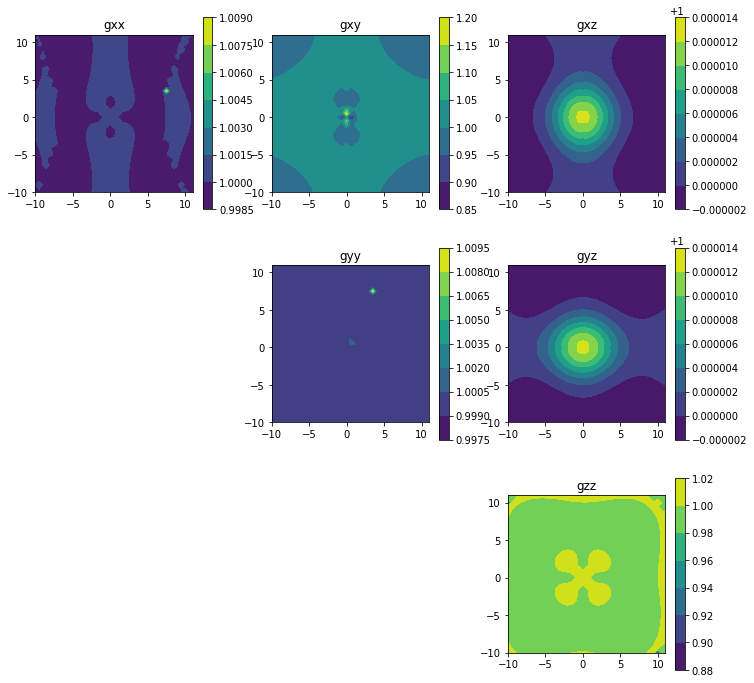

In [11]:
plt.figure(figsize=(12,8))
axs = plt.subplot(1,3,1)
plt.contourf(X, Y, np.dot(gx_ana, 1).reshape(X.shape) / np.dot(fx, 1).reshape(X.shape))
plt.colorbar()
axs.set_aspect('equal')
axs.set_title("gx")
axs = plt.subplot(1,3,2)
plt.contourf(X, Y, np.dot(gy_ana, 1).reshape(X.shape) / np.dot(fy, 1).reshape(X.shape))
plt.colorbar()
axs.set_aspect('equal')
axs.set_title("gy")
axs = plt.subplot(1,3,3)
plt.contourf(X, Y, np.dot(gz_ana, 1).reshape(X.shape) / np.dot(fz, 1).reshape(X.shape))
plt.colorbar()
axs.set_aspect('equal')
axs.set_title("gz")


plt.figure(figsize=(12,12))

axs = plt.subplot(3,3,1)
plt.contourf(X, Y, np.dot(gxx_ana, 1).reshape(X.shape) / np.dot(fxx, 1).reshape(X.shape))
plt.colorbar()
axs.set_aspect('equal')
axs.set_title("gxx")

axs = plt.subplot(3,3,2)
plt.contourf(X, Y, np.dot(gxy_ana, 1).reshape(X.shape) / np.dot(fxy, 1).reshape(X.shape))
plt.colorbar()
axs.set_aspect('equal')
axs.set_title("gxy")

axs = plt.subplot(3,3,3)
plt.contourf(X, Y, np.dot(gxz_ana, 1).reshape(X.shape) / np.dot(fxz, 1).reshape(X.shape))
plt.colorbar()
axs.set_aspect('equal')
axs.set_title("gxz")

axs = plt.subplot(3,3,5)
plt.contourf(X, Y, np.dot(gyy_ana, 1).reshape(X.shape) / np.dot(fyy, 1).reshape(X.shape))
plt.colorbar()
axs.set_aspect('equal')
axs.set_title("gyy")

axs = plt.subplot(3,3,6)
plt.contourf(X, Y, np.dot(gyz_ana, 1).reshape(X.shape) / np.dot(fyz, 1).reshape(X.shape))
plt.colorbar()
axs.set_aspect('equal')
axs.set_title("gyz")

axs = plt.subplot(3,3,9)
plt.contourf(X, Y, np.dot(gzz_ana, 1).reshape(X.shape) / np.dot(fzz, 1).reshape(X.shape))
plt.colorbar()
axs.set_aspect('equal')
axs.set_title("gzz")



